In [583]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import scipy.stats as st
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [584]:
df = pd.read_csv('Cancer Preprocessed February Part Deux.csv')

In [585]:
df.shape

(784, 10)

In [586]:
df = df[df['Mod_Hours'].notna()]

In [587]:
df.head()

,Age,BMI,Diet Servings,Number of Servings,Mod Activity,Mod_Hours,Family Numbers,Result,Years Smoking,Colonoscopy_Polyps_Interaction
0,72,29.24,0,0.0,1.0,0.0,0.0,2.3,19.0,-0.0
1,58,29.75,3,5.0,5.0,2.0,1.0,7.4,36.0,-0.0
2,79,24.32,0,0.0,12.0,4.0,0.0,1.5,0.0,-0.0
3,66,31.41,6,4.0,12.0,2.0,0.0,3.6,2.0,-0.0
4,61,29.41,2,4.0,3.0,2.0,0.0,1.6,30.0,0.0


In [588]:
X=df.copy()

In [623]:

X['Family Numbers'].describe()

count    727.000000
mean       0.748281
std        0.828999
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Family Numbers, dtype: float64

C:\Users\Bozo\AppData\Local\Temp\ipykernel_71016\1515662550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.johnsonsu)
C:\Users\Bozo\AppData\Local\Temp\ipykernel_71016\1515662550.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.norm)
C:\Users\Bozo

<Axes: title={'center': 'Log Normal'}, xlabel='Result'>

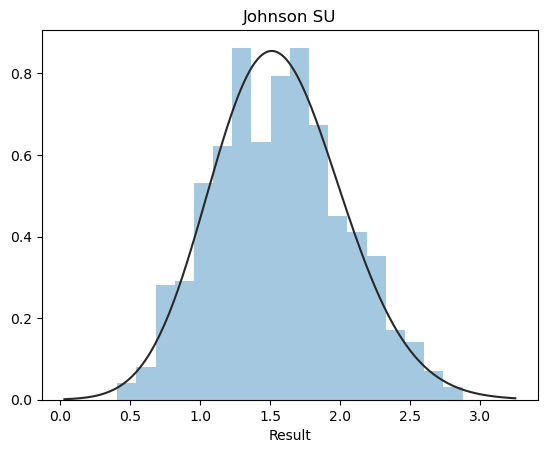

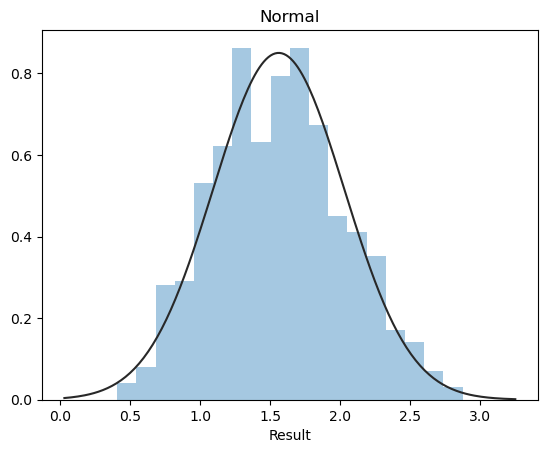

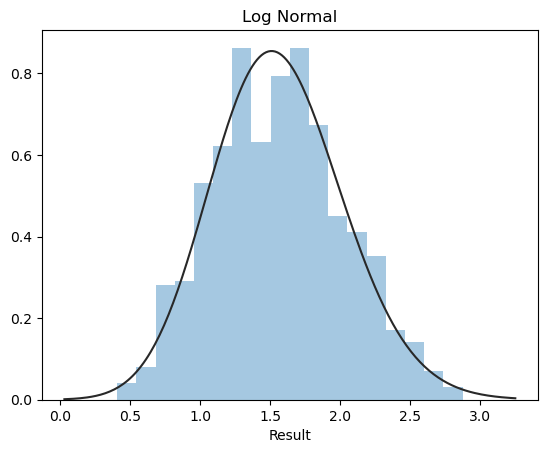

In [590]:
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [591]:
#we see that either Johnson or log distribution will do


X.describe()
X.drop(['Result'],axis=1,inplace=True)

In [592]:
#now let's see the distribution for the Age, BMI, Mod Activity, Diet Servings and Number of Servings
#after doing tests with the same method we can see that the distribution is gaussian(normal)
X.head()

,Age,BMI,Diet Servings,Number of Servings,Mod Activity,Mod_Hours,Family Numbers,Years Smoking,Colonoscopy_Polyps_Interaction
0,72,29.24,0,0.0,1.0,0.0,0.0,19.0,-0.0
1,58,29.75,3,5.0,5.0,2.0,1.0,36.0,-0.0
2,79,24.32,0,0.0,12.0,4.0,0.0,0.0,-0.0
3,66,31.41,6,4.0,12.0,2.0,0.0,2.0,-0.0
4,61,29.41,2,4.0,3.0,2.0,0.0,30.0,0.0


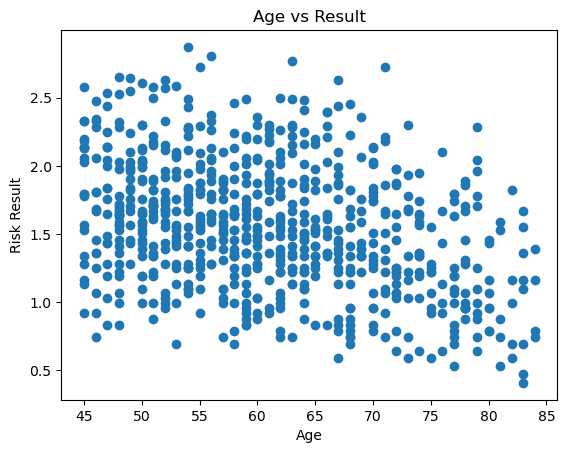

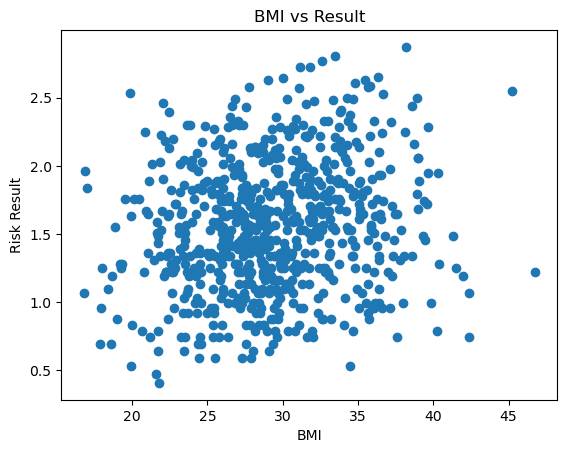

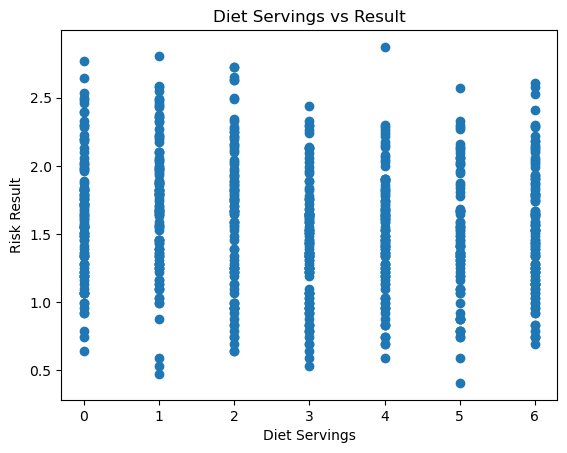

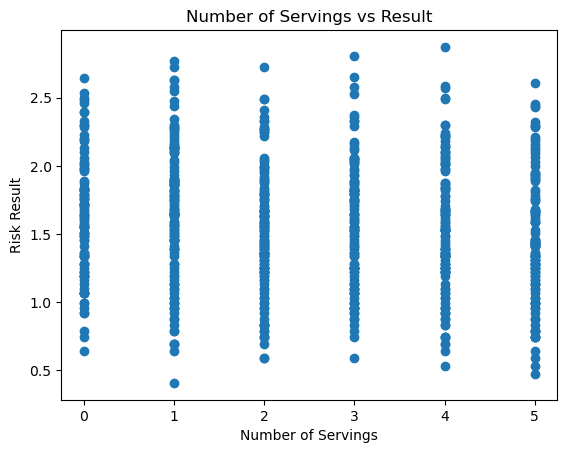

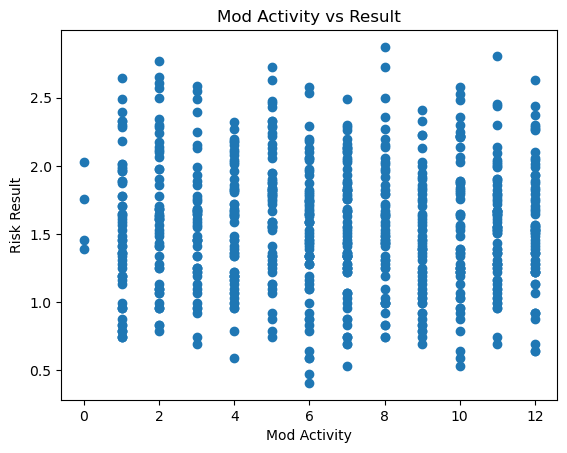

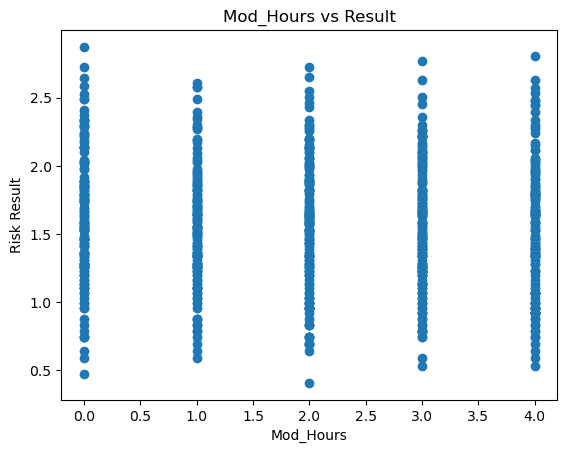

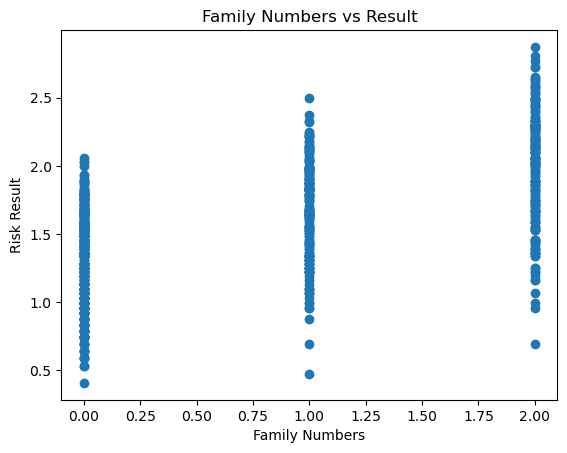

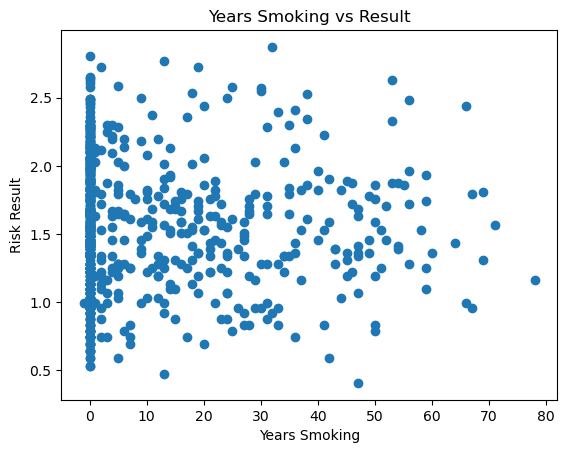

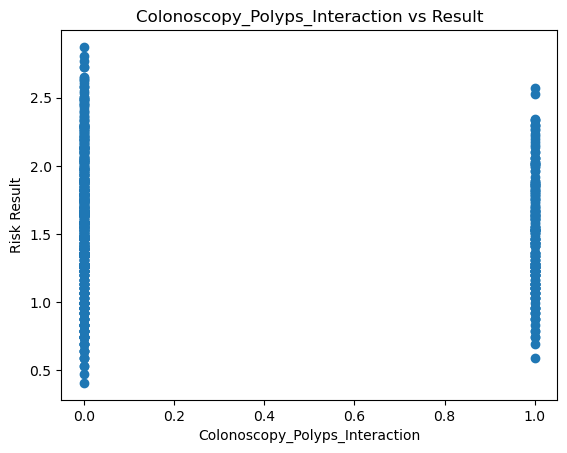

In [593]:
#let's see how each variable corelates to dependent variable
def plot_variables(column,y):
    plt.scatter(X[column], y)
    
    plt.title(f'{column} vs Result')  # Set title
    plt.xlabel(f'{column}')  # Set X-axis label
    plt.ylabel('Risk Result')
    plt.show()

for i in X.columns: 
    plot_variables(i,y)
    

<Axes: >

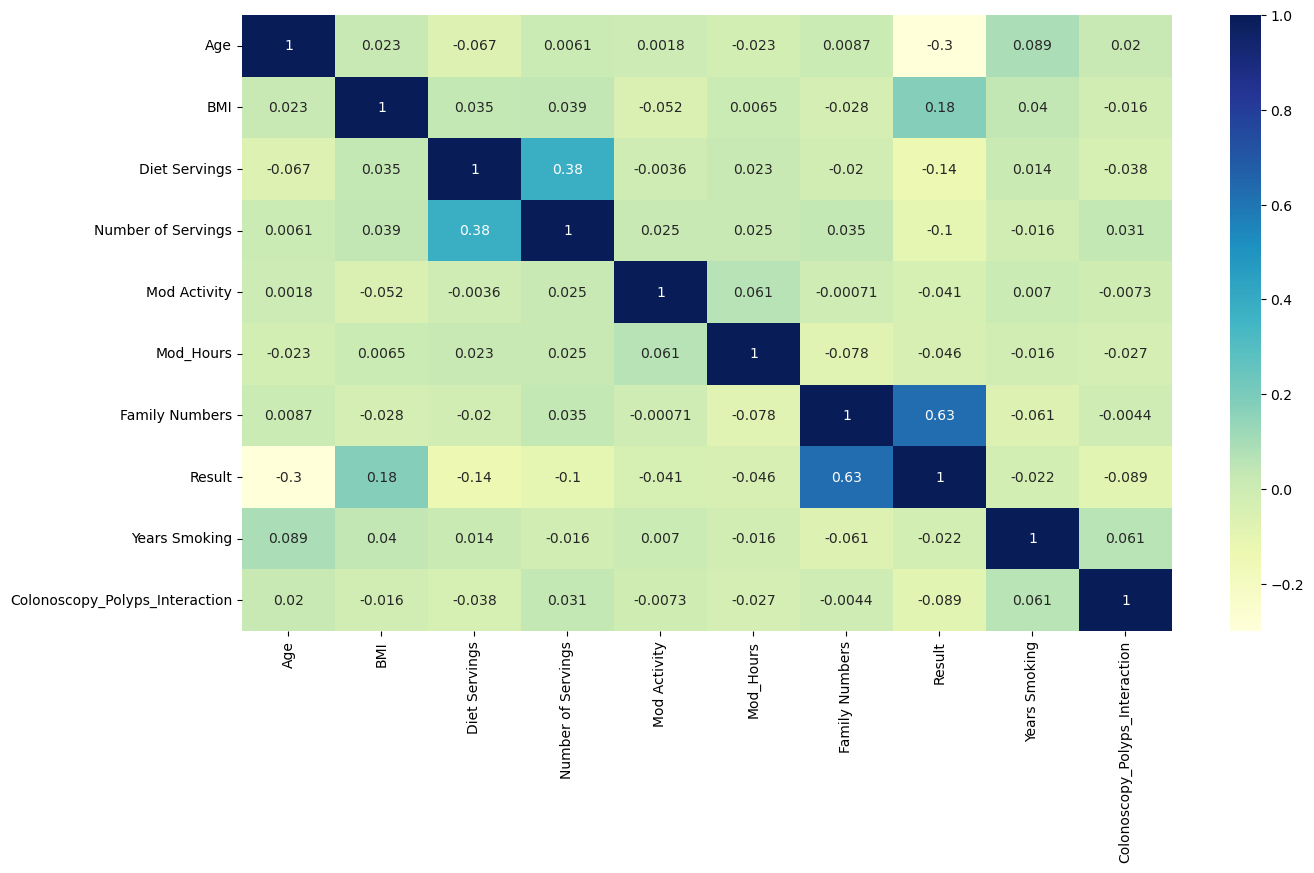

In [594]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [595]:
#based on the heatmap we can see that only 2 variables, 
#Family Numbers and Family History have a linear relationship with the Result

In [596]:
#ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


In [597]:
X_ann = X.values
y=np.log(y+1)
y_ann = y.values

In [598]:
X_train, X_test, y_train, y_test = train_test_split(X_ann, y_ann, test_size = 0.2, random_state = 0)


In [599]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [600]:
model = Sequential([
    Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(64, activation='tanh'),
    Dense(12, activation='tanh'),
    Dense(1,activation='softplus') 
])
model.compile(optimizer='adam', loss='mse')

In [601]:
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
15/15 [==============================] - 1s 11ms/step - loss: 0.0412 - val_loss: 0.0252
Epoch 2/150
15/15 [==============================] - 0s 3ms/step - loss: 0.0208 - val_loss: 0.0215
Epoch 3/150
15/15 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.0176
Epoch 4/150
15/15 [==============================] - 0s 3ms/step - loss: 0.0166 - val_loss: 0.0191
Epoch 5/150
15/15 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0167
Epoch 6/150
15/15 [==============================] - 0s 3ms/step - loss: 0.0152 - val_loss: 0.0187
Epoch 7/150
15/15 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.0171
Epoch 8/150
15/15 [==============================] - 0s 3ms/step - loss: 0.0147 - val_loss: 0.0177
Epoch 9/150
15/15 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.0180
Epoch 10/150
15/15 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0175
Epoch 11

15/15 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0228
Epoch 84/150
15/15 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0229
Epoch 85/150
15/15 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0221
Epoch 86/150
15/15 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0233
Epoch 87/150
15/15 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0233
Epoch 88/150
15/15 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.0231
Epoch 89/150
15/15 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0230
Epoch 90/150
15/15 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.0243
Epoch 91/150
15/15 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0233
Epoch 92/150
15/15 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0238
Epoch 93/150


In [602]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


In [603]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.85 0.58]
 [1.1  0.94]
 [0.72 0.69]
 [1.01 0.79]
 [0.92 0.97]
 [0.97 1.05]
 [1.01 0.8 ]
 [0.81 1.  ]
 [1.16 1.11]
 [0.68 0.67]
 [0.94 0.87]
 [0.57 0.55]
 [0.84 1.04]
 [1.1  1.07]
 [0.53 0.5 ]
 [0.86 0.74]
 [0.91 0.71]
 [0.78 0.58]
 [0.94 0.94]
 [1.32 0.93]
 [0.89 0.9 ]
 [1.29 0.97]
 [1.03 0.93]
 [0.91 0.88]
 [0.84 0.74]
 [0.97 1.09]
 [1.16 1.29]
 [0.85 1.08]
 [1.29 0.87]
 [1.07 1.  ]
 [1.12 1.1 ]
 [0.87 0.76]
 [1.16 1.17]
 [1.   0.69]
 [0.76 0.55]
 [0.81 0.92]
 [0.73 0.63]
 [1.   1.27]
 [0.75 0.72]
 [0.77 1.14]
 [1.24 0.99]
 [1.19 1.35]
 [1.23 0.91]
 [0.94 1.07]
 [0.95 0.9 ]
 [0.81 0.74]
 [0.86 0.91]
 [0.83 0.98]
 [0.78 0.95]
 [1.14 1.04]
 [0.73 0.72]
 [1.04 1.09]
 [0.93 0.98]
 [1.22 1.  ]
 [0.9  0.79]
 [0.95 0.86]
 [1.38 1.27]
 [0.93 0.82]
 [0.97 0.97]
 [0.96 0.89]
 [0.72 0.9 ]
 [0.89 1.05]
 [0.83 1.02]
 [0.73 0.97]
 [1.   0.93]
 [0.86 0.8 ]
 [1.07 0.98]
 [0.97 0.88]
 [0.86 0.74]
 [1.04 0.97]
 [1.07 0.86]
 [0.92 0.94]
 [0.64 0.98]
 [0.92 0.94]
 [0.75 0.91]
 [0.85 0.85]
 [0.72 0.91]

In [605]:
model.save('cancer_March.h5')

In [612]:
one_pred = model.predict(sc.transform([[56,20,0,0,1,0,0,5,0]]))

1/1 [==============================] - 0s 15ms/step


In [613]:
print(one_pred)

[[0.65]]


In [614]:
import joblib
joblib.dump(sc, 'March_scaler.save')

['March_scaler.save']